In [246]:
# SECOM 資料前處理範本

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


# SECOM 資料前處理

## 資料讀取合併與欄位命名

In [247]:
# 1. 讀取與合併資料
secom_data = pd.read_csv('/Users/ching/Documents/SideProject/data/secom/secom.data', header=None, delim_whitespace=True)
secom_data = secom_data.dropna(axis=1, how='all')  # 移除全為 NaN 的欄位
secom_data.columns = [f"sensor_{i+1}" for i in range(secom_data.shape[1])]

secom_labels = pd.read_csv('/Users/ching/Documents/SideProject/data/secom/secom_labels.data', header=None, delim_whitespace=True)
secom_labels.columns = ["label", "timestamp"]
print(secom_labels["label"].value_counts())
# 合併資料
df = pd.concat([secom_data, secom_labels], axis=1)

label
-1    1463
 1     104
Name: count, dtype: int64


/var/folders/zc/bg3g21_j7yq8y2dpzx88kk4w0000gn/T/ipykernel_9988/863649515.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  secom_data = pd.read_csv('/Users/ching/Documents/SideProject/data/secom/secom.data', header=None, delim_whitespace=True)
/var/folders/zc/bg3g21_j7yq8y2dpzx88kk4w0000gn/T/ipykernel_9988/863649515.py:6: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  secom_labels = pd.read_csv('/Users/ching/Documents/SideProject/data/secom/secom_labels.data', header=None, delim_whitespace=True)


In [248]:
df

,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10,...,sensor_583,sensor_584,sensor_585,sensor_586,sensor_587,sensor_588,sensor_589,sensor_590,label,timestamp
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1,19/07/2008 11:55:00
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1,19/07/2008 12:32:00
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1,19/07/2008 13:17:00
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1,19/07/2008 14:43:00
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1,19/07/2008 15:22:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2899.41,2464.36,2179.7333,3085.3781,1.4843,100.0,82.2467,0.1248,1.3424,-0.0045,...,0.4988,0.0143,0.0039,2.8669,0.0068,0.0138,0.0047,203.1720,-1,16/10/2008 15:13:00
1563,3052.31,2522.55,2198.5667,1124.6595,0.8763,100.0,98.4689,0.1205,1.4333,-0.0061,...,0.4975,0.0131,0.0036,2.6238,0.0068,0.0138,0.0047,203.1720,-1,16/10/2008 20:49:00
1564,2978.81,2379.78,2206.3000,1110.4967,0.8236,100.0,99.4122,0.1208,NaN,NaN,...,0.4987,0.0153,0.0041,3.0590,0.0197,0.0086,0.0025,43.5231,-1,17/10/2008 05:26:00
1565,2894.92,2532.01,2177.0333,1183.7287,1.5726,100.0,98.7978,0.1213,1.4622,-0.0072,...,0.5004,0.0178,0.0038,3.5662,0.0262,0.0245,0.0075,93.4941,-1,17/10/2008 06:01:00


## 2. 初步觀察

In [249]:
# 讀取 secom.name 文件，並使用它來命名 DataFrame 的欄位
with open('/Users/ching/Documents/SideProject/data/secom/secom.names') as f:
    columns = f.read().splitlines()

df.info()  # 查看資料型態與缺失值
df.describe()  # 進行初步統計摘要


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 592 entries, sensor_1 to timestamp
dtypes: float64(590), int64(1), object(1)
memory usage: 7.1+ MB


,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10,...,sensor_582,sensor_583,sensor_584,sensor_585,sensor_586,sensor_587,sensor_588,sensor_589,sensor_590,label
count,1561.000000,1560.000000,1553.000000,1553.000000,1553.000000,1553.0,1553.000000,1558.000000,1565.000000,1565.000000,...,618.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1567.000000
mean,3014.452896,2495.850231,2200.547318,1396.376627,4.197013,100.0,101.112908,0.121822,1.462862,-0.000841,...,97.934373,0.500096,0.015318,0.003847,3.067826,0.021458,0.016475,0.005283,99.670066,-0.867262
std,73.621787,80.407705,29.513152,441.691640,56.355540,0.0,6.237214,0.008961,0.073897,0.015116,...,87.520966,0.003404,0.017180,0.003720,3.578033,0.012358,0.008808,0.002867,93.891919,0.498010
min,2743.240000,2158.750000,2060.660000,0.000000,0.681500,100.0,82.131100,0.000000,1.191000,-0.053400,...,0.000000,0.477800,0.006000,0.001700,1.197500,-0.016900,0.003200,0.001000,0.000000,-1.000000
25%,2966.260000,2452.247500,2181.044400,1081.875800,1.017700,100.0,97.920000,0.121100,1.411200,-0.010800,...,46.184900,0.497900,0.011600,0.003100,2.306500,0.013425,0.010600,0.003300,44.368600,-1.000000
50%,3011.490000,2499.405000,2201.066700,1285.214400,1.316800,100.0,101.512200,0.122400,1.461600,-0.001300,...,72.288900,0.500200,0.013800,0.003600,2.757650,0.020500,0.014800,0.004600,71.900500,-1.000000
75%,3056.650000,2538.822500,2218.055500,1591.223500,1.525700,100.0,104.586700,0.123800,1.516900,0.008400,...,116.539150,0.502375,0.016500,0.004100,3.295175,0.027600,0.020300,0.006400,114.749700,-1.000000
max,3356.350000,2846.440000,2315.266700,3715.041700,1114.536600,100.0,129.252200,0.128600,1.656400,0.074900,...,737.304800,0.509800,0.476600,0.104500,99.303200,0.102800,0.079900,0.028600,737.304800,1.000000


### 查看缺失值的數量

In [250]:
df.isnull().sum()  # 查看缺失值的數量


sensor_1       6
sensor_2       7
sensor_3      14
sensor_4      14
sensor_5      14
              ..
sensor_588     1
sensor_589     1
sensor_590     1
label          0
timestamp      0
Length: 592, dtype: int64

# 3. 資料分割 (Train-Test Split)

In [251]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['label', "timestamp"])  # 特徵欄位
y = df['label']  # 標籤欄位

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [253]:
df_train = pd.concat([X_train, y_train], axis=1)
# df_train.sort_index(inplace=True)
df_train.reset_index(drop=True, inplace=True)
df_train

,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10,...,sensor_582,sensor_583,sensor_584,sensor_585,sensor_586,sensor_587,sensor_588,sensor_589,sensor_590,label
0,2951.41,2577.27,2207.8111,1202.4520,1.6219,100.0,108.7689,0.1212,1.5440,-0.0163,...,182.5607,0.5076,0.0206,0.0056,4.0586,0.0095,0.0173,0.0050,182.5607,-1
1,2998.89,2532.66,2189.3556,2363.6412,2.1415,100.0,83.4233,0.1246,1.4108,0.0095,...,NaN,0.5022,0.0097,0.0027,1.9367,0.0147,0.0095,0.0028,65.0365,-1
2,3083.49,2536.43,2213.7556,1113.5599,0.7217,100.0,104.1667,0.1211,1.5082,-0.0057,...,NaN,0.5040,0.0193,0.0044,3.8378,0.0145,0.0213,0.0074,146.5131,-1
3,3004.09,2388.74,2223.8000,1503.1248,1.1705,100.0,110.0600,0.1211,1.4441,-0.0177,...,145.6339,0.5049,0.0121,0.0035,2.4037,0.0207,0.0301,0.0096,145.6339,1
4,3031.79,2479.69,2186.9889,949.2201,1.2981,100.0,103.3322,0.1219,1.4636,0.0009,...,70.0618,0.5035,0.0085,0.0024,1.6818,0.0484,0.0339,0.0105,70.0618,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1248,2995.26,2447.22,2185.1000,1201.0491,0.7821,100.0,105.8489,0.1208,1.3608,0.0250,...,NaN,0.5048,0.0132,0.0031,2.6094,0.0272,0.0171,0.0054,62.7655,-1
1249,3020.70,2563.19,2164.2667,711.0258,1.2884,100.0,129.2522,0.1252,1.3571,-0.0165,...,27.5232,0.4933,0.0128,0.0027,2.6032,0.0239,0.0066,0.0022,27.5232,-1
1250,3081.34,2453.78,2175.3445,1147.3421,1.1419,100.0,107.1422,0.1251,1.3997,0.0062,...,NaN,0.4985,0.0089,0.0028,1.7792,0.0220,0.0143,0.0045,65.2186,-1
1251,3006.80,2536.87,NaN,NaN,NaN,NaN,NaN,0.0000,1.4814,0.0180,...,NaN,0.4974,0.0111,0.0034,2.2344,-0.0031,0.0168,0.0061,545.6838,-1


## 3. 缺失值處理

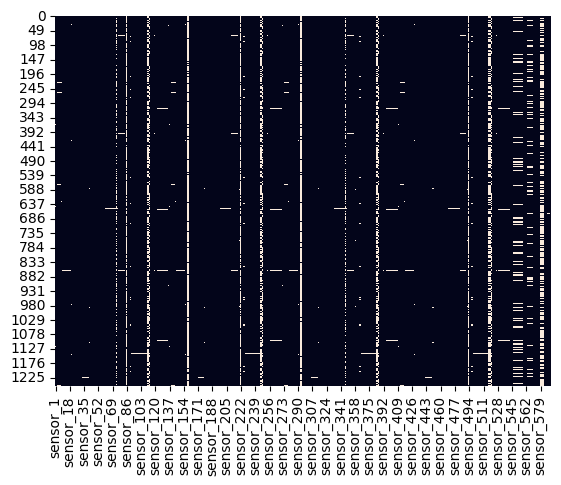

Index(['sensor_73', 'sensor_74', 'sensor_86', 'sensor_110', 'sensor_111',
       'sensor_112', 'sensor_113', 'sensor_158', 'sensor_159', 'sensor_221',
       'sensor_245', 'sensor_246', 'sensor_247', 'sensor_248', 'sensor_293',
       'sensor_294', 'sensor_346', 'sensor_347', 'sensor_359', 'sensor_383',
       'sensor_384', 'sensor_385', 'sensor_386', 'sensor_493', 'sensor_517',
       'sensor_518', 'sensor_519', 'sensor_520', 'sensor_579', 'sensor_580',
       'sensor_581', 'sensor_582'],
      dtype='object')


In [254]:
# 顯示缺失值 heatmap
sns.heatmap(df_train.isnull(), cbar=False)
plt.show()

# 若有過多缺失的欄位（超過 40%），可以選擇刪除這些欄位
missing_data = df_train.isnull().mean()
cols_to_drop = missing_data[missing_data > 0.4].index
print(cols_to_drop)
df_train = df_train.drop(columns=cols_to_drop)

# 其他缺失值欄位可以使用中位數填補
## 分離 label
# label = df['label']  # 假設欄位名是 'label'
features = df_train.drop(columns=['label'])
## 填補 features 中的缺失值
numeric_cols = features.select_dtypes(include=['float64', 'int64']).columns
features[numeric_cols] = features[numeric_cols].fillna(features[numeric_cols].median())
## 合併回來
df_train = pd.concat([features, df_train['label']], axis=1)


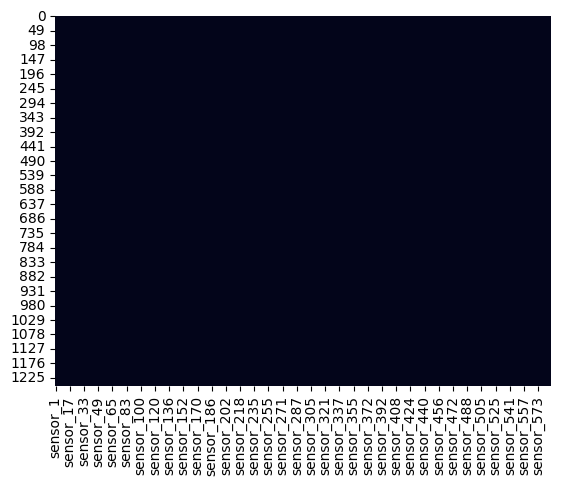

,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10,...,sensor_578,sensor_583,sensor_584,sensor_585,sensor_586,sensor_587,sensor_588,sensor_589,sensor_590,label
0,2951.41,2577.27,2207.8111,1202.4520,1.6219,100.0,108.7689,0.1212,1.5440,-0.0163,...,8.6470,0.5076,0.0206,0.0056,4.0586,0.0095,0.0173,0.0050,182.5607,-1
1,2998.89,2532.66,2189.3556,2363.6412,2.1415,100.0,83.4233,0.1246,1.4108,0.0095,...,13.2830,0.5022,0.0097,0.0027,1.9367,0.0147,0.0095,0.0028,65.0365,-1
2,3083.49,2536.43,2213.7556,1113.5599,0.7217,100.0,104.1667,0.1211,1.5082,-0.0057,...,14.9920,0.5040,0.0193,0.0044,3.8378,0.0145,0.0213,0.0074,146.5131,-1
3,3004.09,2388.74,2223.8000,1503.1248,1.1705,100.0,110.0600,0.1211,1.4441,-0.0177,...,12.0404,0.5049,0.0121,0.0035,2.4037,0.0207,0.0301,0.0096,145.6339,1
4,3031.79,2479.69,2186.9889,949.2201,1.2981,100.0,103.3322,0.1219,1.4636,0.0009,...,13.3366,0.5035,0.0085,0.0024,1.6818,0.0484,0.0339,0.0105,70.0618,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1248,2995.26,2447.22,2185.1000,1201.0491,0.7821,100.0,105.8489,0.1208,1.3608,0.0250,...,8.6853,0.5048,0.0132,0.0031,2.6094,0.0272,0.0171,0.0054,62.7655,-1
1249,3020.70,2563.19,2164.2667,711.0258,1.2884,100.0,129.2522,0.1252,1.3571,-0.0165,...,15.1191,0.4933,0.0128,0.0027,2.6032,0.0239,0.0066,0.0022,27.5232,-1
1250,3081.34,2453.78,2175.3445,1147.3421,1.1419,100.0,107.1422,0.1251,1.3997,0.0062,...,9.0851,0.4985,0.0089,0.0028,1.7792,0.0220,0.0143,0.0045,65.2186,-1
1251,3006.80,2536.87,2200.9889,1283.3701,1.3171,100.0,101.4922,0.0000,1.4814,0.0180,...,17.2472,0.4974,0.0111,0.0034,2.2344,-0.0031,0.0168,0.0061,545.6838,-1


In [255]:
sns.heatmap(df_train.isnull(), cbar=False)
plt.show()
df_train

## 4.特徵分佈與資料理解

### 欄位分佈圖（Histogram / KDE）


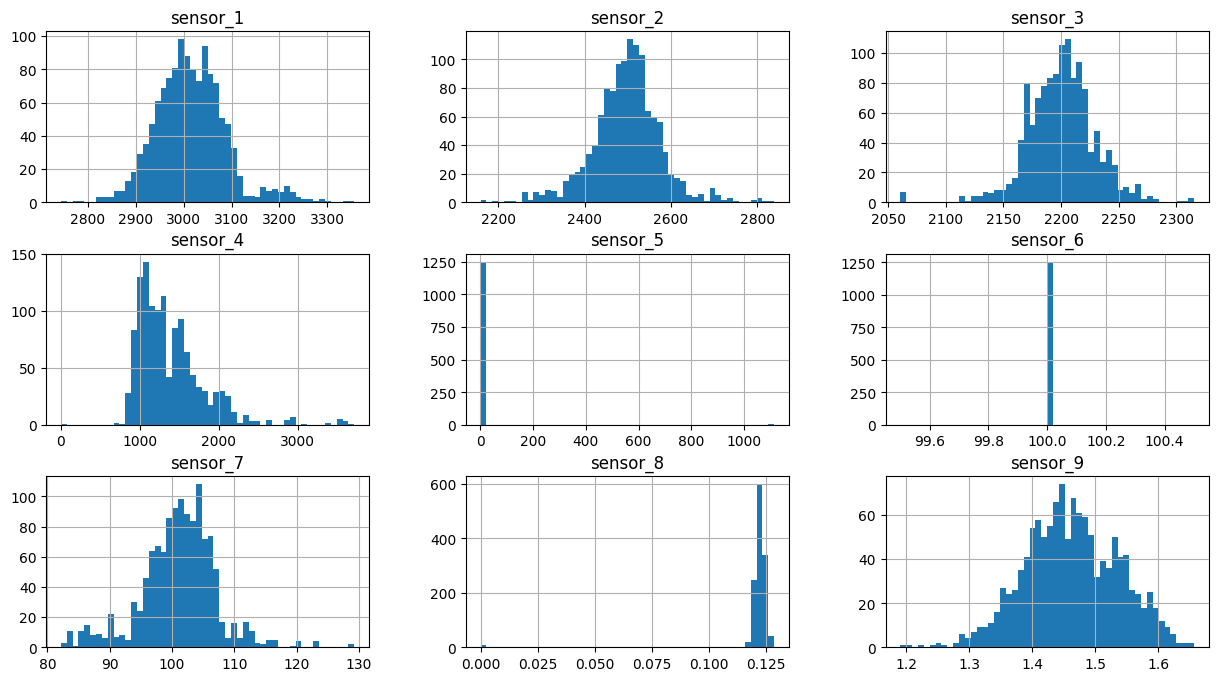

標準差過低欄位數量： 116
['sensor_6', 'sensor_14', 'sensor_43', 'sensor_50', 'sensor_53', 'sensor_70', 'sensor_98', 'sensor_142', 'sensor_150', 'sensor_179', 'sensor_180', 'sensor_187', 'sensor_190', 'sensor_191', 'sensor_192', 'sensor_193', 'sensor_194', 'sensor_195', 'sensor_227', 'sensor_230', 'sensor_231', 'sensor_232', 'sensor_233', 'sensor_234', 'sensor_235', 'sensor_236', 'sensor_237', 'sensor_238', 'sensor_241', 'sensor_242', 'sensor_243', 'sensor_244', 'sensor_257', 'sensor_258', 'sensor_259', 'sensor_260', 'sensor_261', 'sensor_262', 'sensor_263', 'sensor_264', 'sensor_265', 'sensor_266', 'sensor_267', 'sensor_277', 'sensor_285', 'sensor_314', 'sensor_315', 'sensor_316', 'sensor_323', 'sensor_326', 'sensor_327', 'sensor_328', 'sensor_329', 'sensor_330', 'sensor_331', 'sensor_365', 'sensor_370', 'sensor_371', 'sensor_372', 'sensor_373', 'sensor_374', 'sensor_375', 'sensor_376', 'sensor_379', 'sensor_380', 'sensor_381', 'sensor_382', 'sensor_395', 'sensor_396', 'sensor_397', 'sensor_398'

In [256]:
# 範例：畫前 10 欄的分佈
features[numeric_cols[:9]].hist(bins=50, figsize=(15, 8))
plt.show()
# 篩選標準差過小的特徵（變異太小）
# 計算標準差
stds = features[numeric_cols].std()

# 設定標準差閾值（threshold）
threshold = 1e-4

# 篩選標準差低於 threshold 的欄位
low_variance_cols = stds[stds < threshold].index.tolist()
print("標準差過低欄位數量：", len(low_variance_cols))
print(low_variance_cols)

##### 刪除標準差過低欄位的


In [257]:
# 刪除這些欄位
features = features.drop(columns=low_variance_cols)

features

,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_7,sensor_8,sensor_9,sensor_10,sensor_11,...,sensor_577,sensor_578,sensor_583,sensor_584,sensor_585,sensor_586,sensor_587,sensor_588,sensor_589,sensor_590
0,2951.41,2577.27,2207.8111,1202.4520,1.6219,108.7689,0.1212,1.5440,-0.0163,-0.0238,...,2.0239,8.6470,0.5076,0.0206,0.0056,4.0586,0.0095,0.0173,0.0050,182.5607
1,2998.89,2532.66,2189.3556,2363.6412,2.1415,83.4233,0.1246,1.4108,0.0095,-0.0026,...,1.6245,13.2830,0.5022,0.0097,0.0027,1.9367,0.0147,0.0095,0.0028,65.0365
2,3083.49,2536.43,2213.7556,1113.5599,0.7217,104.1667,0.1211,1.5082,-0.0057,-0.0069,...,1.4765,14.9920,0.5040,0.0193,0.0044,3.8378,0.0145,0.0213,0.0074,146.5131
3,3004.09,2388.74,2223.8000,1503.1248,1.1705,110.0600,0.1211,1.4441,-0.0177,0.0263,...,1.5400,12.0404,0.5049,0.0121,0.0035,2.4037,0.0207,0.0301,0.0096,145.6339
4,3031.79,2479.69,2186.9889,949.2201,1.2981,103.3322,0.1219,1.4636,0.0009,0.0031,...,1.4091,13.3366,0.5035,0.0085,0.0024,1.6818,0.0484,0.0339,0.0105,70.0618
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1248,2995.26,2447.22,2185.1000,1201.0491,0.7821,105.8489,0.1208,1.3608,0.0250,-0.0060,...,1.5125,8.6853,0.5048,0.0132,0.0031,2.6094,0.0272,0.0171,0.0054,62.7655
1249,3020.70,2563.19,2164.2667,711.0258,1.2884,129.2522,0.1252,1.3571,-0.0165,-0.0007,...,1.8585,15.1191,0.4933,0.0128,0.0027,2.6032,0.0239,0.0066,0.0022,27.5232
1250,3081.34,2453.78,2175.3445,1147.3421,1.1419,107.1422,0.1251,1.3997,0.0062,-0.0063,...,2.0351,9.0851,0.4985,0.0089,0.0028,1.7792,0.0220,0.0143,0.0045,65.2186
1251,3006.80,2536.87,2200.9889,1283.3701,1.3171,101.4922,0.0000,1.4814,0.0180,-0.0001,...,1.5218,17.2472,0.4974,0.0111,0.0034,2.2344,-0.0031,0.0168,0.0061,545.6838


In [258]:
features.info()  # 查看資料型態與缺失值

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1253 entries, 0 to 1252
Columns: 442 entries, sensor_1 to sensor_590
dtypes: float64(442)
memory usage: 4.2 MB


### Boxplot

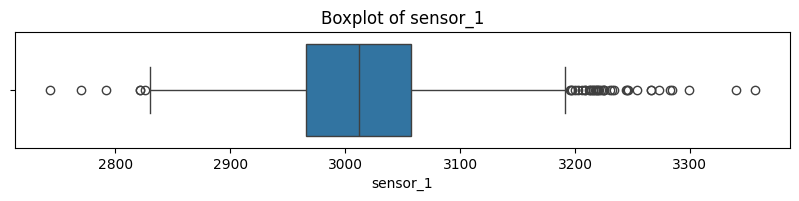

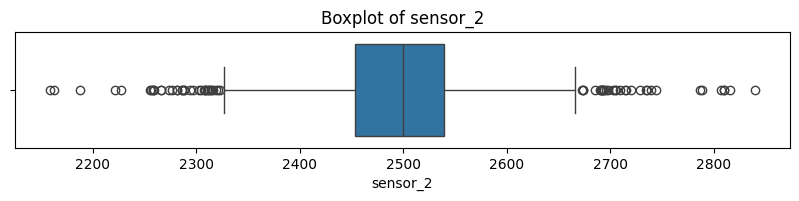

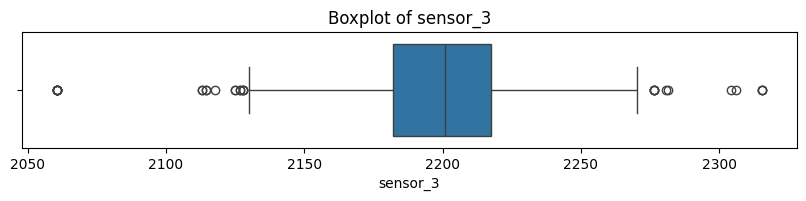

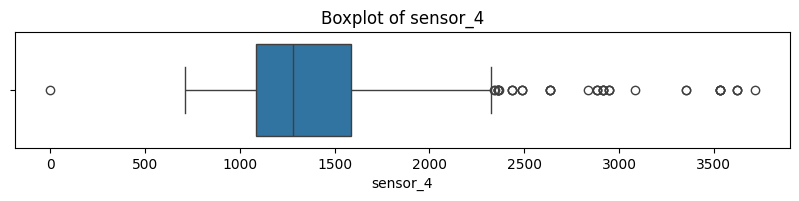

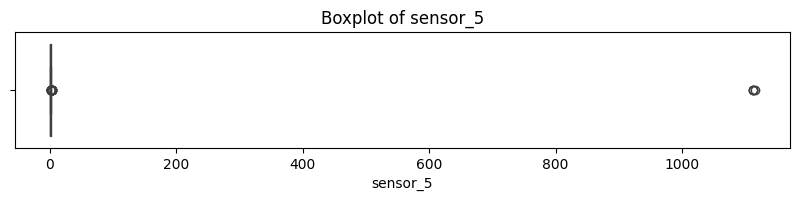

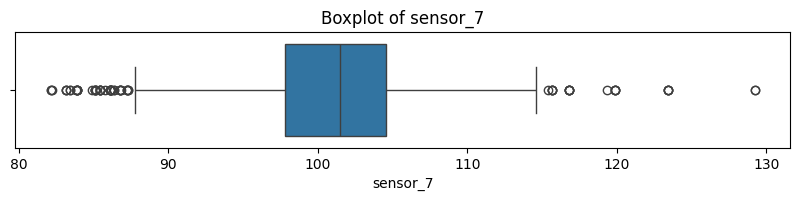

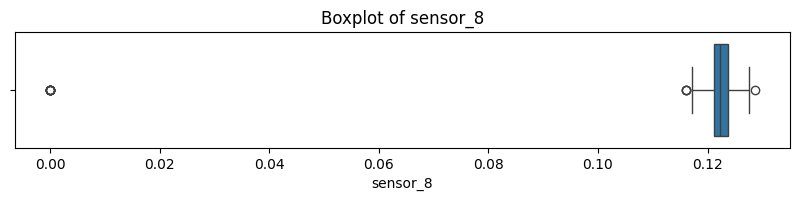

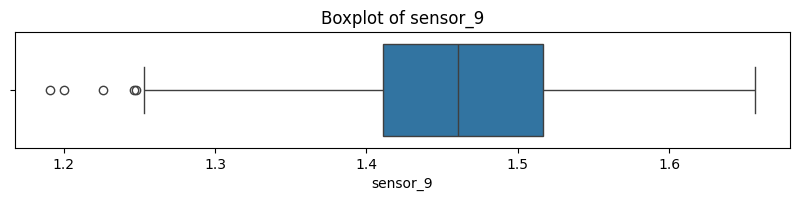

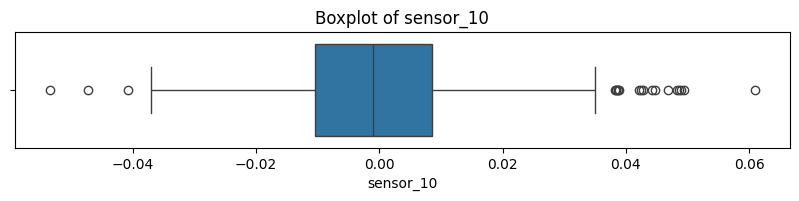

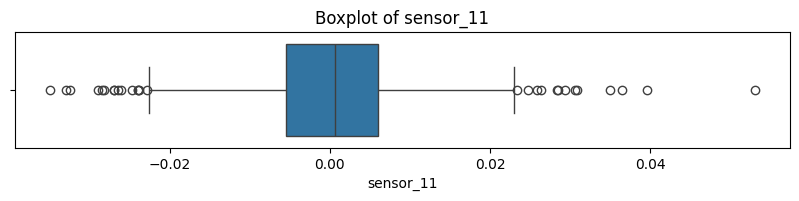

In [259]:
# import seaborn as sns
numeric_cols = features.select_dtypes(include=['float64', 'int64']).columns

for col in numeric_cols[:10]:  # 前 10 欄為例
    plt.figure(figsize=(10, 1.5))
    sns.boxplot(x=df_train[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

#### 去離群值
 離群值剪裁（IQR method）— 做法如下：

 1. 基本概念：

對每個欄位，離群值定義為：

小於 Q1 - 1.5×IQR
大於 Q3 + 1.5×IQR

其中：
	•	Q1 = 第 25 百分位數
	•	Q3 = 第 75 百分位數
	•	IQR = Q3 - Q1


In [260]:
def clip_outliers_iqr(df, columns):
    df_clipped = df.copy()
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_clipped[col] = df[col].clip(lower=lower_bound, upper=upper_bound)
    return df_clipped

In [261]:

features = clip_outliers_iqr(features, numeric_cols)
features.info()  # 查看資料型態與缺失值
features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1253 entries, 0 to 1252
Columns: 442 entries, sensor_1 to sensor_590
dtypes: float64(442)
memory usage: 4.2 MB


,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_7,sensor_8,sensor_9,sensor_10,sensor_11,...,sensor_577,sensor_578,sensor_583,sensor_584,sensor_585,sensor_586,sensor_587,sensor_588,sensor_589,sensor_590
0,2951.41,2577.27,2207.8111,1202.45200,1.6219,108.76890,0.12120,1.5440,-0.0163,-0.02275,...,2.0239,8.6470,0.5076,0.0206,0.0056,4.0586,0.0095,0.0173,0.0050,182.5607
1,2998.89,2532.66,2189.3556,2341.43145,2.1415,87.56445,0.12460,1.4108,0.0095,-0.00260,...,1.6245,13.2830,0.5022,0.0097,0.0027,1.9367,0.0147,0.0095,0.0028,65.0365
2,3083.49,2536.43,2213.7556,1113.55990,0.7217,104.16670,0.12110,1.5082,-0.0057,-0.00690,...,1.4765,14.9920,0.5040,0.0193,0.0044,3.8378,0.0145,0.0213,0.0074,146.5131
3,3004.09,2388.74,2223.8000,1503.12480,1.1705,110.06000,0.12110,1.4441,-0.0177,0.02325,...,1.5400,12.0404,0.5049,0.0121,0.0035,2.4037,0.0207,0.0301,0.0096,145.6339
4,3031.79,2479.69,2186.9889,949.22010,1.2981,103.33220,0.12190,1.4636,0.0009,0.00310,...,1.4091,13.3366,0.5035,0.0085,0.0024,1.6818,0.0484,0.0339,0.0105,70.0618
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1248,2995.26,2447.22,2185.1000,1201.04910,0.7821,105.84890,0.12080,1.3608,0.0250,-0.00600,...,1.5125,8.6853,0.5048,0.0132,0.0031,2.6094,0.0272,0.0171,0.0054,62.7655
1249,3020.70,2563.19,2164.2667,711.02580,1.2884,114.80005,0.12520,1.3571,-0.0165,-0.00070,...,1.8585,15.1191,0.4933,0.0128,0.0027,2.6032,0.0239,0.0066,0.0022,27.5232
1250,3081.34,2453.78,2175.3445,1147.34210,1.1419,107.14220,0.12510,1.3997,0.0062,-0.00630,...,2.0351,9.0851,0.4985,0.0089,0.0028,1.7792,0.0220,0.0143,0.0045,65.2186
1251,3006.80,2536.87,2200.9889,1283.37010,1.3171,101.49220,0.11705,1.4814,0.0180,-0.00010,...,1.5218,17.2472,0.4974,0.0111,0.0034,2.2344,-0.0031,0.0168,0.0061,225.1536


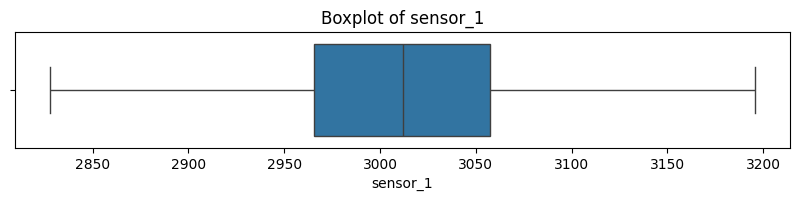

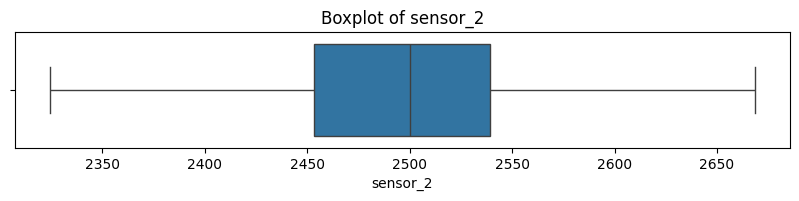

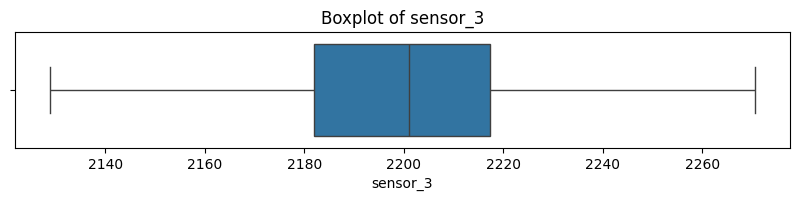

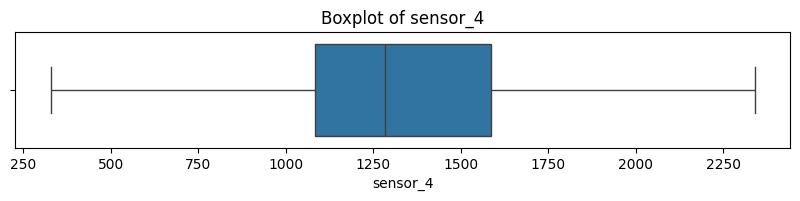

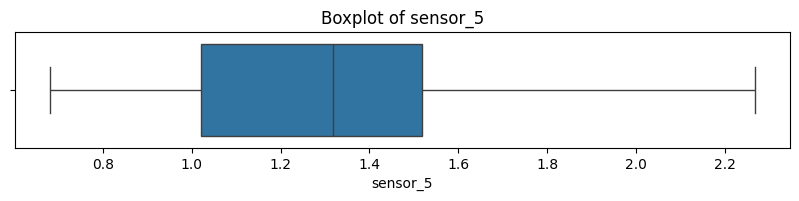

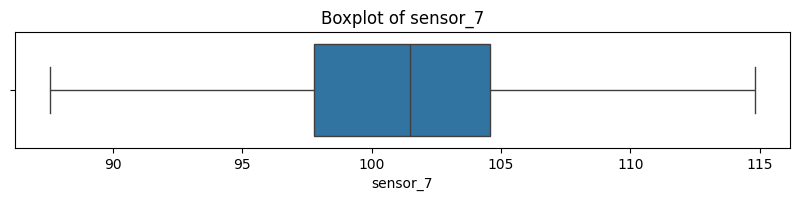

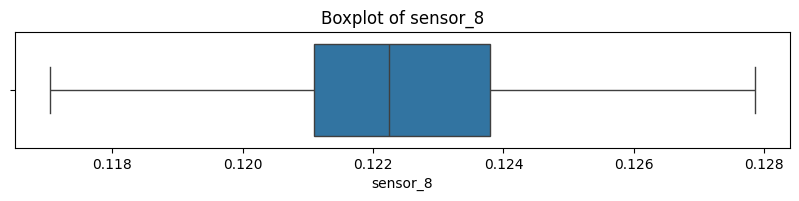

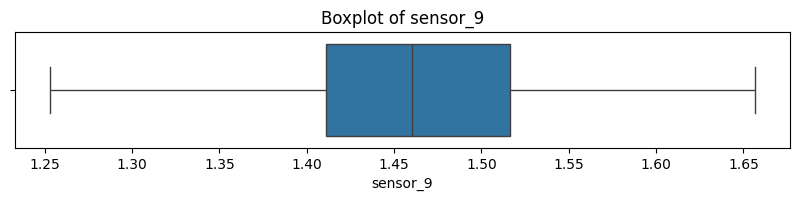

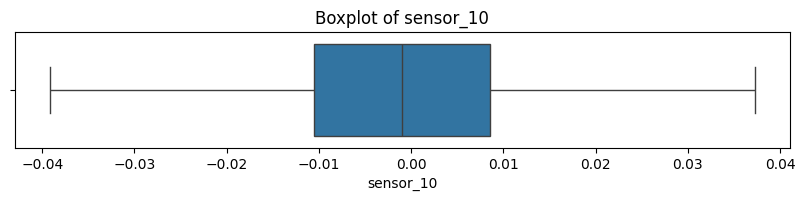

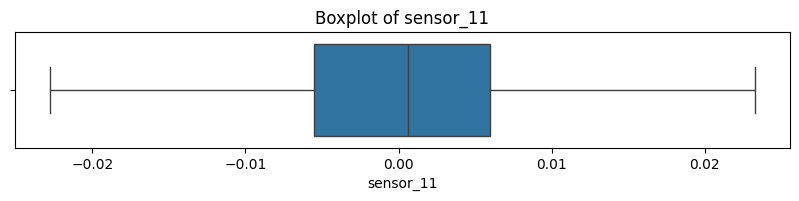

In [262]:
import seaborn as sns
for col in numeric_cols[:10]:  # 前 10 欄為例
    plt.figure(figsize=(10, 1.5))
    sns.boxplot(x=features[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

### Correlation Matrix + Heatmap

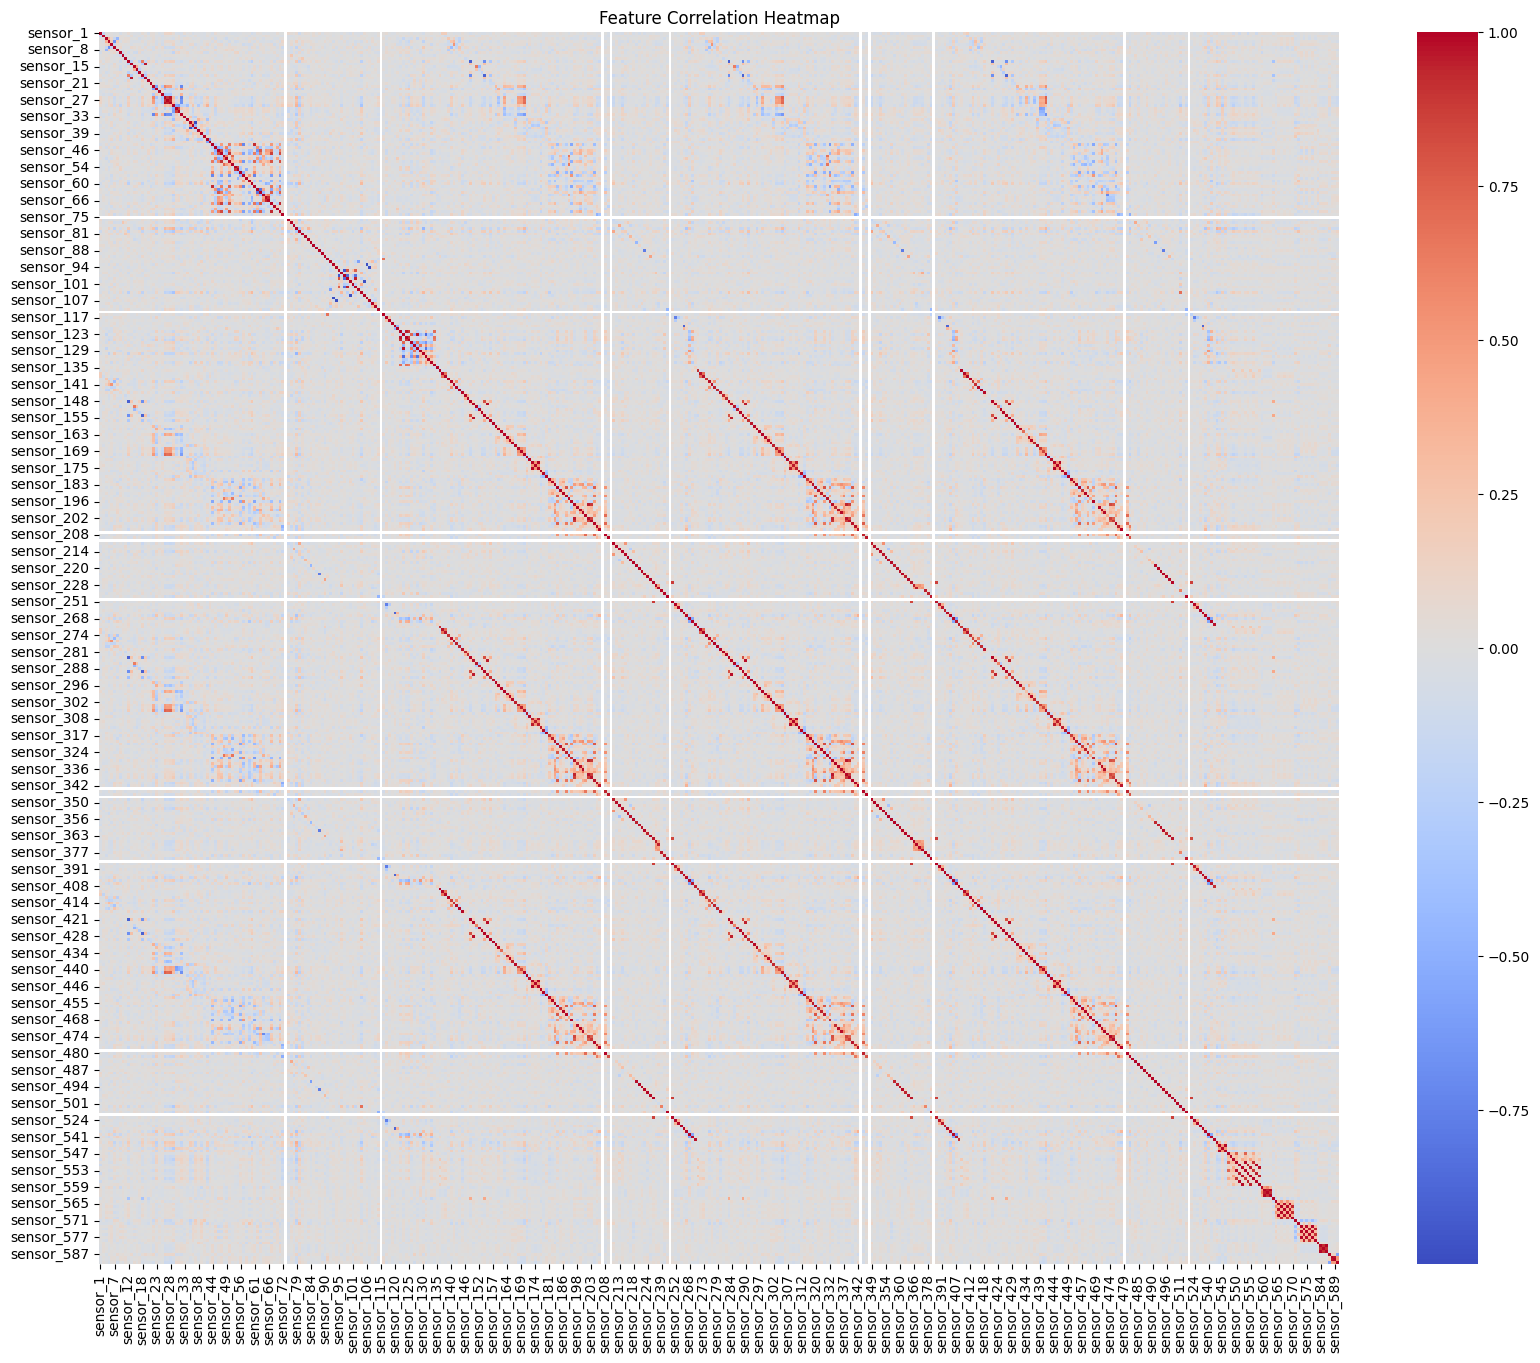

In [263]:
numeric_cols = features.select_dtypes(include=['float64', 'int64']).columns

corr = features[numeric_cols].corr()
plt.figure(figsize=(20, 16))
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title("Feature Correlation Heatmap")
plt.show()



##### 篩出相關係數高度相關的欄位
	•	某兩個欄位的相關係數（correlation）超過 ±0.95 ➜ 高度冗餘，可刪其中一個
	•	一整排某一欄都跟其他欄幾乎沒關（都接近 0）➜ 該欄可能不相關，可視情況處理


In [264]:
# 篩出相關係數高於 0.95 的欄位對
high_corr = corr.abs().unstack().sort_values(ascending=False)
high_corr = high_corr[high_corr < 1]  # 排除自己和自己
high_corr[high_corr > 0.95]

sensor_37   sensor_35     1.000000
sensor_35   sensor_37     1.000000
sensor_173  sensor_175    1.000000
sensor_175  sensor_173    1.000000
sensor_308  sensor_310    0.999999
                            ...   
sensor_254  sensor_392    0.950741
sensor_99   sensor_102    0.950554
sensor_102  sensor_99     0.950554
sensor_389  sensor_523    0.950062
sensor_523  sensor_389    0.950062
Length: 450, dtype: float64

In [265]:
def remove_high_corr_columns_v2(df, threshold=0.95):
    """
    移除高相關的欄位，優先根據缺失值數量進行判斷，
    若缺失值數量相同，則根據標準差進行判斷。
    
    參數:
    df: DataFrame，包含所有的特徵資料
    threshold: float，相關係數的閾值，預設為0.95
    
    回傳:
    更新後的 DataFrame，移除了高相關欄位
    """
    import numpy as np
    
    # 計算相關係數矩陣
    corr_matrix = df.corr().abs()

    # 建立布林遮罩，只看上三角矩陣
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    
    # 初始化要移除的欄位清單
    to_drop = []

    for column in upper.columns:
        high_corr_cols = upper.index[upper[column] > threshold].tolist()
        
        for col in high_corr_cols:
            # 先根據缺失值數量進行判斷
            if df[col].isnull().sum() > df[column].isnull().sum():
                to_drop.append(col)
            elif df[col].isnull().sum() == df[column].isnull().sum():
                # 若缺失值相同，再根據標準差進行判斷
                if df[col].std() > df[column].std():
                    to_drop.append(column)
                else:
                    to_drop.append(col)
            else:
                to_drop.append(column)

    # 移除這些欄位
    df = df.drop(columns=set(to_drop))
    
    return df, to_drop



In [266]:
features, to_remove = remove_high_corr_columns_v2(features, threshold=0.95)
print("移除的高相關欄位：", to_remove)
df_train = pd.concat([features, df_train['label']], axis=1)


移除的高相關欄位： ['sensor_13', 'sensor_26', 'sensor_37', 'sensor_102', 'sensor_105', 'sensor_106', 'sensor_107', 'sensor_122', 'sensor_128', 'sensor_155', 'sensor_173', 'sensor_202', 'sensor_272', 'sensor_273', 'sensor_275', 'sensor_276', 'sensor_278', 'sensor_280', 'sensor_283', 'sensor_284', 'sensor_284', 'sensor_286', 'sensor_287', 'sensor_288', 'sensor_289', 'sensor_290', 'sensor_290', 'sensor_290', 'sensor_292', 'sensor_295', 'sensor_296', 'sensor_297', 'sensor_298', 'sensor_299', 'sensor_300', 'sensor_301', 'sensor_302', 'sensor_303', 'sensor_304', 'sensor_305', 'sensor_306', 'sensor_307', 'sensor_308', 'sensor_308', 'sensor_309', 'sensor_310', 'sensor_310', 'sensor_308', 'sensor_311', 'sensor_312', 'sensor_313', 'sensor_318', 'sensor_319', 'sensor_320', 'sensor_321', 'sensor_322', 'sensor_324', 'sensor_325', 'sensor_333', 'sensor_335', 'sensor_336', 'sensor_338', 'sensor_338', 'sensor_339', 'sensor_340', 'sensor_341', 'sensor_342', 'sensor_345', 'sensor_350', 'sensor_351', 'sensor_352'

In [267]:
df_train.info()  # 查看資料型態與缺失值
df_train

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1253 entries, 0 to 1252
Columns: 282 entries, sensor_1 to label
dtypes: float64(281), int64(1)
memory usage: 2.7 MB


,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_7,sensor_8,sensor_9,sensor_10,sensor_11,...,sensor_573,sensor_574,sensor_578,sensor_583,sensor_585,sensor_586,sensor_587,sensor_588,sensor_590,label
0,2951.41,2577.27,2207.8111,1202.45200,1.6219,108.76890,0.12120,1.5440,-0.0163,-0.02275,...,10.8200,0.2019,8.6470,0.5076,0.0056,4.0586,0.0095,0.0173,182.5607,-1
1,2998.89,2532.66,2189.3556,2341.43145,2.1415,87.56445,0.12460,1.4108,0.0095,-0.00260,...,8.6400,0.2994,13.2830,0.5022,0.0027,1.9367,0.0147,0.0095,65.0365,-1
2,3083.49,2536.43,2213.7556,1113.55990,0.7217,104.16670,0.12110,1.5082,-0.0057,-0.00690,...,7.9600,0.2694,14.9920,0.5040,0.0044,3.8378,0.0145,0.0213,146.5131,-1
3,3004.09,2388.74,2223.8000,1503.12480,1.1705,110.06000,0.12110,1.4441,-0.0177,0.02325,...,8.2200,0.2701,12.0404,0.5049,0.0035,2.4037,0.0207,0.0301,145.6339,1
4,3031.79,2479.69,2186.9889,949.22010,1.2981,103.33220,0.12190,1.4636,0.0009,0.00310,...,7.4900,0.3229,13.3366,0.5035,0.0024,1.6818,0.0484,0.0339,70.0618,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1248,2995.26,2447.22,2185.1000,1201.04910,0.7821,105.84890,0.12080,1.3608,0.0250,-0.00600,...,8.0099,0.1878,8.6853,0.5048,0.0031,2.6094,0.0272,0.0171,62.7655,-1
1249,3020.70,2563.19,2164.2667,711.02580,1.2884,114.80005,0.12520,1.3571,-0.0165,-0.00070,...,9.8900,0.3112,15.1191,0.4933,0.0027,2.6032,0.0239,0.0066,27.5232,-1
1250,3081.34,2453.78,2175.3445,1147.34210,1.1419,107.14220,0.12510,1.3997,0.0062,-0.00630,...,10.8300,0.2222,9.0851,0.4985,0.0028,1.7792,0.0220,0.0143,65.2186,-1
1251,3006.80,2536.87,2200.9889,1283.37010,1.3171,101.49220,0.11705,1.4814,0.0180,-0.00010,...,8.0800,0.3375,17.2472,0.4974,0.0034,2.2344,-0.0031,0.0168,225.1536,-1


## 5. 標準化（Normalization / Standardization）

In [268]:
# 特徵標準化處理
scaler = StandardScaler()
features_scaled = pd.DataFrame(scaler.fit_transform(features), columns=features.columns)
features_scaled
df_scaled = pd.concat([features_scaled, df_train['label']], axis=1)

# df_scaled = pd.concat([features_scaled, df_train['label']], axis=1)



In [269]:
df_scaled

,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_7,sensor_8,sensor_9,sensor_10,sensor_11,...,sensor_573,sensor_574,sensor_578,sensor_583,sensor_585,sensor_586,sensor_587,sensor_588,sensor_590,label
0,-0.891515,1.109115,0.261023,-0.455092,0.803251,1.369003,-0.604314,1.112828,-1.062925,-2.587175,...,0.902338,-1.022411,-1.302999,2.323235,2.412032,1.513891,-1.045778,0.159413,1.502150,-1
1,-0.219806,0.494866,-0.414978,2.590581,2.208193,-2.401582,1.139630,-0.700003,0.700583,-0.323785,...,-0.143823,-0.106968,-0.304586,0.674039,-1.229567,-1.227841,-0.574328,-0.878014,-0.405380,-1
2,0.977046,0.546776,0.478763,-0.692793,-1.630793,0.550638,-0.655606,0.625595,-0.338383,-0.806792,...,-0.470148,-0.388643,0.063466,1.223771,0.905163,1.228593,-0.592460,0.691427,0.917063,-1
3,-0.146241,-1.486813,0.846676,0.348918,-0.417286,1.598587,-0.655606,-0.246795,-1.158619,2.579869,...,-0.345377,-0.382070,-0.572193,1.498637,-0.224988,-0.624425,-0.030347,1.861858,0.902793,1
4,0.245636,-0.234494,-0.501667,-1.132243,-0.072270,0.402246,-0.245266,0.018596,0.112747,0.316479,...,-0.695697,0.113677,-0.293042,1.071068,-1.606284,-1.557200,2.481033,2.367272,-0.323815,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1248,-0.271161,-0.681584,-0.570855,-0.458843,-1.467478,0.849767,-0.809484,-1.380495,1.760055,-0.705697,...,-0.446202,-1.154798,-1.294751,1.468096,-0.727277,-0.358637,0.558966,0.132812,-0.442241,-1
1249,0.088744,0.915243,-1.333952,-1.769183,-0.098497,2.441465,1.447385,-1.430852,-1.076595,-0.110364,...,0.456040,0.003824,0.090839,-2.044079,-1.229567,-0.366648,0.259777,-1.263725,-1.014257,-1
1250,0.946630,-0.591257,-0.928186,-0.602458,-0.494617,1.079742,1.396093,-0.851072,0.475018,-0.739395,...,0.907137,-0.831811,-1.208650,-0.455965,-1.103995,-1.431348,0.087516,-0.239597,-0.402424,-1
1251,-0.107902,0.552835,0.011135,-0.238714,-0.020896,0.075057,-2.732952,0.260852,1.281583,-0.042968,...,-0.412562,0.250759,0.549149,-0.791912,-0.350560,-0.843179,-2.188138,0.092911,2.193473,-1


## 6. 特徵分析與降維

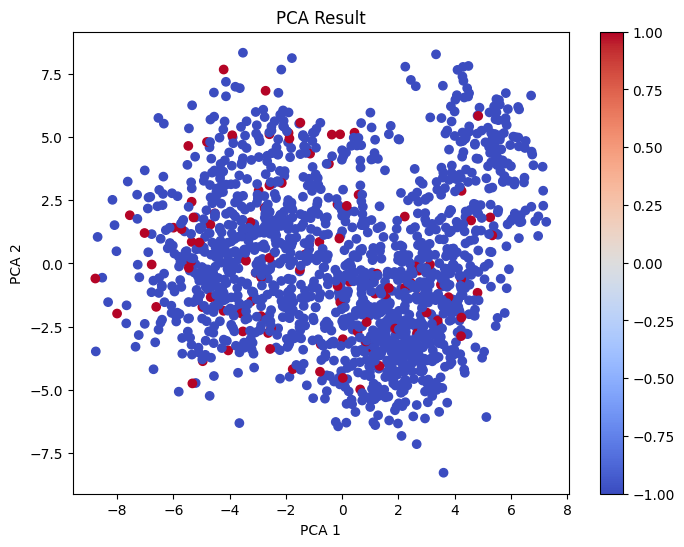

In [ ]:

# PCA 降維並視覺化
pca = PCA(n_components=50)    # 建立 PCA 模型，設定只取前兩個主成分
pca_result = pca.fit_transform(features_scaled)  # 對標準化後的資料做降維

# 畫出 PCA 降維後的資料分佈圖
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df['label'], cmap='coolwarm')
plt.colorbar()
plt.title('PCA Result')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()



### 主成分的 解釋變異量比例圖（Explained Variance Ratio Plot）


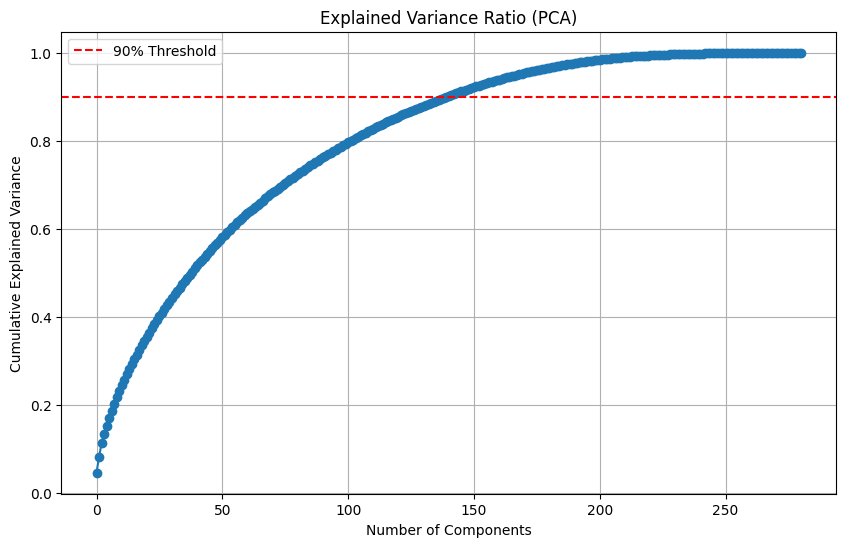

In [109]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

# 建立 PCA 並保留所有主成分
pca_full = PCA().fit(features_scaled)

# 畫出解釋變異量比例圖
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca_full.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance Ratio (PCA)')
plt.grid(True)
plt.axhline(y=0.9, color='r', linestyle='--', label='90% Threshold')
plt.legend()
plt.show()

In [110]:
# 找出保留 95% 解釋力所需的主成分數量
pca_95 = PCA(n_components=0.95)  # 自動決定
X_pca_95 = pca_95.fit_transform(features_scaled)

print(f"保留 95% 解釋力所需主成分數量：{pca_95.n_components_}")

保留 95% 解釋力所需主成分數量：169


In [111]:
# 假設 y 是標籤欄位
df_pca = pd.DataFrame(X_pca_95, columns=[f'PC{i+1}' for i in range(pca_95.n_components_)])
df_pca['label'] = df['label'] 
df_scaled = pd.concat([features_scaled, secom_labels], axis=1)

df_pca.to_csv('secom_pca_95.csv', index=False)

In [104]:
df_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC133,PC134,PC135,PC136,PC137,PC138,PC139,PC140,PC141,label
0,-5.654718,0.082293,-3.031819,0.370738,1.206342,-0.108743,-0.309516,1.108414,0.896574,2.262953,...,0.259049,-0.458173,0.167360,0.796887,1.102616,-0.425199,-0.060702,-0.485698,-0.752336,-1
1,-3.659545,0.204235,-3.818724,0.166806,-1.341831,-0.882153,0.222784,-0.930034,-0.847175,-0.870812,...,-1.719596,-1.092031,-0.246580,1.981412,1.307433,-1.921490,-0.349686,-0.455074,0.247502,-1
2,-0.470801,3.943791,-2.286965,1.265969,-1.401142,0.484608,1.247308,-1.051477,-0.296798,0.475140,...,-0.185839,0.647633,1.514073,0.602376,-0.297729,-1.036490,0.240629,-0.731920,1.167986,1
3,-1.922757,4.800235,-1.297189,1.607251,-1.110171,1.985136,1.902049,1.546005,-0.932060,-1.681253,...,0.219239,-1.247224,0.965566,0.731499,1.141648,-1.462401,0.507815,-1.665308,2.176845,-1
4,-2.968676,4.992167,1.771524,-0.650268,-4.508268,-4.699130,-1.542992,2.783028,1.436603,-0.588629,...,-0.249456,-0.899123,-1.049363,0.313049,1.058628,-0.643636,2.078673,-0.970641,-1.754511,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,5.278056,2.327656,-3.956921,-1.052039,3.814507,0.920932,2.926012,-0.636853,-3.702552,-0.067877,...,1.041714,0.547340,0.808532,0.570847,0.079845,-0.852753,0.834577,0.439191,1.130100,-1
1563,-0.486298,2.604200,2.471619,-2.398768,1.705282,-1.498620,-5.173862,1.190577,0.358168,1.970006,...,-0.687667,0.240318,-0.848359,-0.315837,0.235813,-0.728887,-0.324542,-0.573193,-0.111218,-1
1564,2.732397,-2.837944,-1.103855,0.436702,-0.006088,0.218922,0.709386,-0.011225,0.308215,0.608034,...,0.486613,-1.248535,-0.290477,0.948574,0.730395,1.485121,-0.181317,0.944443,-0.170857,-1
1565,4.089895,1.426512,-3.622392,0.024479,2.464217,0.711891,0.924479,-1.805031,-2.492180,-1.595216,...,-1.053378,0.111351,1.490673,-0.193047,-0.828301,0.140744,1.213778,-0.493217,0.258175,-1


/Users/ching/.pyenv/versions/3.10.13/envs/cv-auto-label-env/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/ching/.pyenv/versions/3.10.13/envs/cv-auto-label-env/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/Users/ching/.pyenv/versions/3.10.13/envs/cv-auto-label-env/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 38477 (\N{CJK UNIFIED IDEOGRAPH-964D}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/ching/.pyenv/versions/3.10.13/envs/cv-auto-label-env/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 32173 (\N{CJK UNIFIED IDEOGRAPH-7DAD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/ching/.pyenv/versions/3.

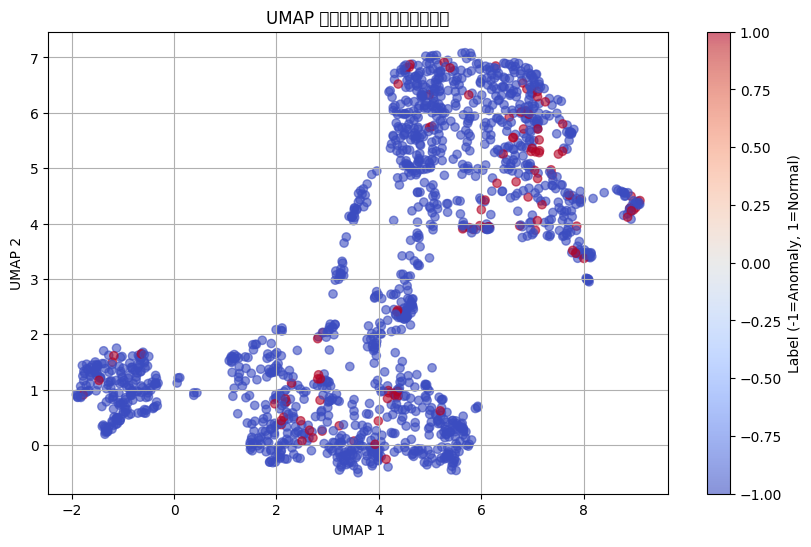

In [115]:
import umap
import matplotlib.pyplot as plt

# 假設 features 是已經經過標準化的資料 (X_scaled)
umap_model = umap.UMAP(n_components=2, random_state=42)
X_umap = umap_model.fit_transform(features_scaled)

# 畫 2D 散點圖（標色顯示異常與正常）
plt.figure(figsize=(10, 6))
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=df['label'], cmap='coolwarm', alpha=0.6)
plt.title('UMAP 降維後：異常與正常樣本分佈')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.colorbar(label='Label (-1=Anomaly, 1=Normal)')

plt.grid(True)
plt.show()



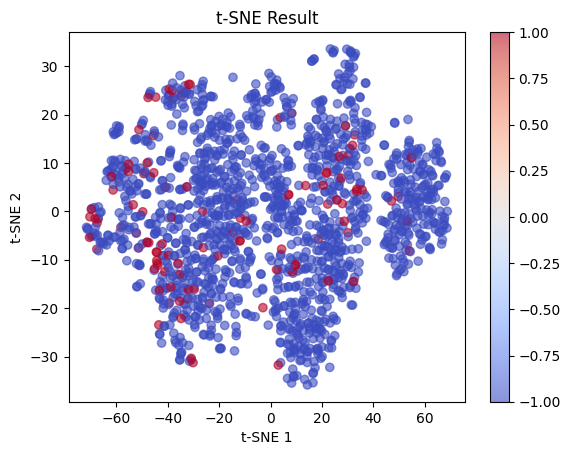

In [90]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(features_scaled)

plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=df['label'], cmap='coolwarm', alpha=0.6)
plt.title('t-SNE Result')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.colorbar()
plt.show()

In [99]:
# 每個主成分對應的權重（也就是線性組合係數）
loadings = pd.DataFrame(
    pca_95.components_.T,
    index=df_scaled.columns,
    columns=[f'PC{i+1}' for i in range(pca_95.n_components_)]
)

ValueError: Shape of passed values is (281, 211), indices imply (283, 211)

In [100]:
loadings

NameError: name 'loadings' is not defined

In [89]:
# 例如看 PC1 貢獻最大的 10 個特徵
top_features_PC1 = loadings['PC1'].abs().sort_values(ascending=False).head(10)
print(top_features_PC1)

sensor_197    0.188636
sensor_480    0.187937
sensor_208    0.187120
sensor_200    0.182687
sensor_344    0.179997
sensor_205    0.179029
sensor_333    0.177816
sensor_204    0.177125
sensor_336    0.175716
sensor_337    0.175570
Name: PC1, dtype: float64


/var/folders/zc/bg3g21_j7yq8y2dpzx88kk4w0000gn/T/ipykernel_7765/1575267876.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_features.values, y=top_10_features.index, palette="viridis")


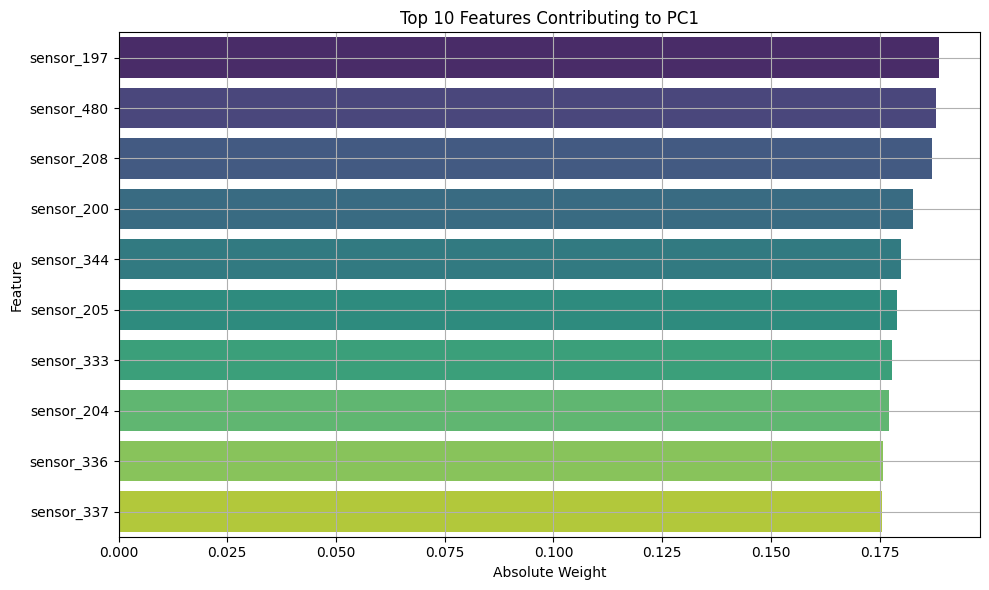

In [96]:

# 執行 PCA（可先設定想要幾個主成分）
pca = PCA(n_components=10)
pca.fit(df_scaled)

# 指定要觀察哪個主成分（從 0 開始，PC1 是 index 0）
component_index = 0  # 改成 1 就是 PC2


# 指定主成分 PC1（index 0）
loadings = pd.Series(pca.components_[component_index], index=df_scaled.columns)

# Top 10 特徵
top_10_features = loadings.abs().sort_values(ascending=False).head(10)

# 繪圖
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_features.values, y=top_10_features.index, palette="viridis")
plt.title(f"Top 10 Features Contributing to PC{component_index + 1}")
plt.xlabel("Absolute Weight")
plt.ylabel("Feature")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# 6. 分離標籤與特徵
X = df_scaled
y = df['Label']

# 7. 儲存清理過後的資料
X.to_csv('secom_features_cleaned.csv', index=False)
y.to_csv('secom_labels_cleaned.csv', index=False)